### -- Ritvik Kharkar 5/10/2018 --

# Tools We'll Need

In [49]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import pearsonr
import math
import random 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from datetime import datetime
import itertools

# What Does Our Data Look Like?

In [50]:
# Data Source: biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls
# Save as 'titanic.csv'
titanic_df = pd.read_csv('titanic.csv')

In [51]:
titanic_df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [52]:
# Randomly sort the data, this'll be important later on
titanic_df = titanic_df.sample(frac = 1)

In [53]:
#relabel index
titanic_df.reset_index(drop=True, inplace=True)

# Clean the dataset

In [54]:
#Select a subset of the columns
titanic_df = titanic_df[['pclass', 'survived', 'sex', 'age', 'fare']]

In [55]:
#A dictionary in python
sex_dict = {'male': 0, 'female': 1}

In [56]:
#Our first look at the magic of "apply"
titanic_df.sex = titanic_df.sex.apply(lambda x: sex_dict[x] if x in sex_dict.keys() else x)

In [57]:
#How bad is our missing data situation?
for field in titanic_df.columns:
    print field, sum([math.isnan(x) for x in titanic_df[field]])

pclass 0
survived 0
sex 0
age 263
fare 1


In [58]:
#remove the one row with a missing fare
titanic_df = titanic_df[titanic_df.fare.apply(lambda x: math.isnan(x) == False)]

In [59]:
#Is the fact that age is not reported relevant?
no_age_df = titanic_df[titanic_df.age.apply(lambda x: math.isnan(x) == True)]
yes_age_df = titanic_df[titanic_df.age.apply(lambda x: math.isnan(x) == False)]

In [60]:
for field in ['fare', 'sex', 'survived', 'pclass']:
    print field
    print 'Missing Age: ', no_age_df[field].mean()
    print 'Present Age: ', yes_age_df[field].mean()
    print '----------'

fare
Missing Age:  19.8233193916
Present Age:  36.6860802871
----------
sex
Missing Age:  0.296577946768
Present Age:  0.371291866029
----------
survived
Missing Age:  0.277566539924
Present Age:  0.408612440191
----------
pclass
Missing Age:  2.64258555133
Present Age:  2.20669856459
----------


In [61]:
#Make a decision about what to do with missing values
first_class_ages = list(yes_age_df[yes_age_df.pclass == 1].age)
second_class_ages = list(yes_age_df[yes_age_df.pclass == 2].age)
third_class_ages = list(yes_age_df[yes_age_df.pclass == 3].age)

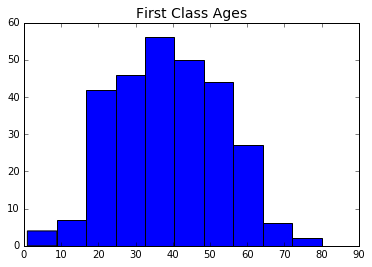

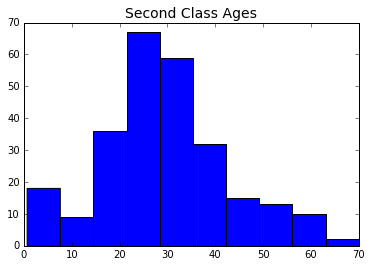

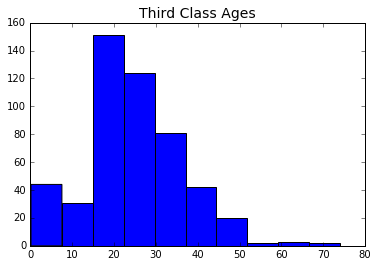

In [62]:
plt.hist(first_class_ages)
plt.title('First Class Ages', fontsize=14)
plt.show()
plt.hist(second_class_ages)
plt.title('Second Class Ages', fontsize=14)
plt.show()
plt.hist(third_class_ages)
plt.title('Third Class Ages', fontsize=14)

In [63]:
def get_age_from_distribution(pclass):
    if pclass == 1:
        return random.choice(first_class_ages)
    elif pclass == 2:
        return random.choice(second_class_ages)
    elif pclass == 3:
        return random.choice(third_class_ages)

In [64]:
titanic_df.age = titanic_df.apply(lambda x: get_age_from_distribution(x.pclass) if math.isnan(x.age) else x.age, axis=1)

# What's correlated with Survival?

In [65]:
#Set up our correlation matrix
correlation_matrix =np.zeros(shape=(5,5))

In [66]:
correlation_matrix

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [67]:
#Populate it
for i, field1 in enumerate(titanic_df.columns):
    for j, field2 in enumerate(titanic_df.columns):
            correlation_matrix[i,j] = pearsonr(titanic_df[field1], titanic_df[field2])[0]

In [68]:
titanic_df.columns

Index([u'pclass', u'survived', u'sex', u'age', u'fare'], dtype='object')

In [69]:
correlation_matrix

array([[ 1.        , -0.31212165, -0.12419806, -0.41691988, -0.55862873],
       [-0.31212165,  1.        ,  0.52848275, -0.02496097,  0.24426547],
       [-0.12419806,  0.52848275,  1.        , -0.06069222,  0.18552298],
       [-0.41691988, -0.02496097, -0.06069222,  1.        ,  0.18751985],
       [-0.55862873,  0.24426547,  0.18552298,  0.18751985,  1.        ]])

# Let's make it look cooler

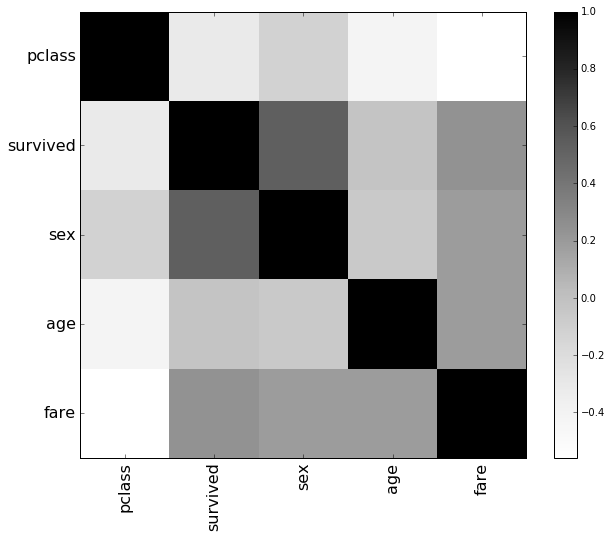

In [70]:
#Set figure size
plt.figure(figsize=(10,8))
#Specify we would like a heatmap
plt.imshow(correlation_matrix, interpolation = 'nearest', cmap = 'Greys')
#Specify the x and y labels
plt.xticks(range(5), titanic_df.columns, rotation = 90, fontsize = 16)
plt.yticks(range(5), titanic_df.columns, fontsize = 16)
#include a colorbar for reference
plt.colorbar()

# Let's dig into the data further

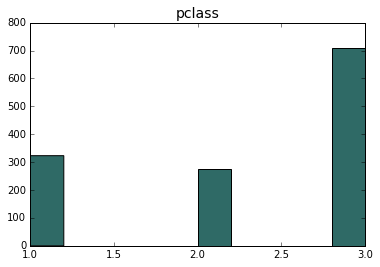

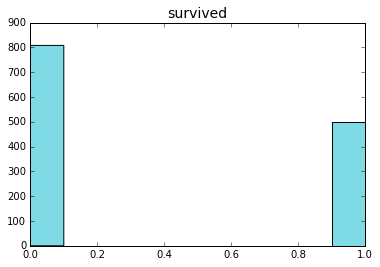

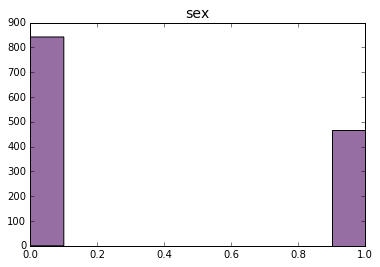

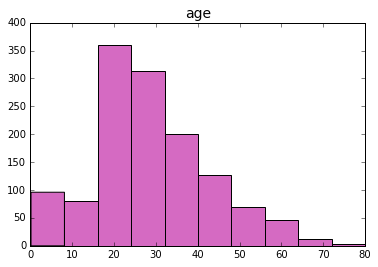

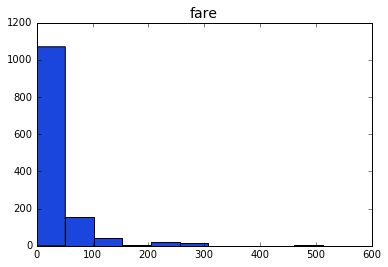

In [71]:
#for each column, draw a historgram of the distribution
for field in titanic_df.columns:
    plt.hist(titanic_df[field], color = np.random.rand(3,1))
    plt.title(field, fontsize=14)
    plt.show()

# Normalize Data

In [72]:
for col in titanic_df.columns:
    if col != 'survived':
        titanic_df[col] = titanic_df[col].apply(lambda x: (x-np.mean(titanic_df[col]))/np.std(titanic_df[col]))

In [73]:
titanic_df

,pclass,survived,sex,age,fare
0,-1.545283,1,-0.743938,1.603586,-0.054031
1,-1.545283,1,-0.743938,0.901417,0.372229
2,0.842466,0,-0.743938,1.463152,-0.487940
3,0.842466,0,-0.743938,-1.766826,-0.080606
4,0.842466,0,-0.743938,-0.222054,-0.491081
5,0.842466,0,-0.743938,-0.397596,-0.503804
6,-0.351408,1,1.344198,0.339681,-0.198989
7,0.842466,0,1.344198,-0.502921,-0.476102
8,-1.545283,1,1.344198,0.971634,0.428038
9,-0.351408,0,-0.743938,-0.011403,-0.107746


# Train - Test Split

In [74]:
#define what fraction will be saved for testing
train_frac = 0.7
train_size = int(train_frac*len(titanic_df))

feat_list = ['pclass', 'age', 'sex', 'fare']

#get train and test dataframes
train_df = titanic_df[feat_list][:train_size].as_matrix()
test_df = titanic_df[feat_list][train_size:].as_matrix()

#Define train and test survival lists
surv_list = titanic_df.survived
train_surv_list = surv_list[:train_size]
test_surv_list = surv_list[train_size:]

# A First Prediction - KNN

In [75]:
#initialize the KNN
neigh = KNeighborsClassifier(n_neighbors=15)

In [76]:
#fit the model with the training data
neigh.fit(train_df, train_surv_list) 
pred = neigh.predict(test_df)
print sum(((pred - test_surv_list) == 0))/float(len(pred))

0.737913486005


# What is the Best k?

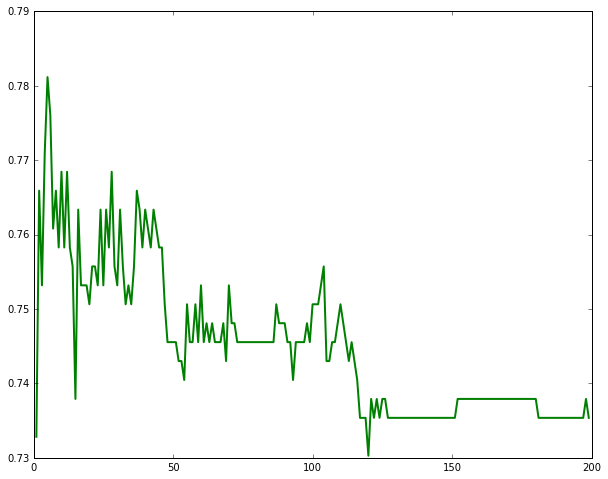

In [77]:
#Graph accuracy vs k for SKL KNN
acc_at_k = []
max_neigh = 200
for k in range(1,max_neigh):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(train_df, train_surv_list)  
    pred = neigh.predict(test_df)
    acc = sum(((pred - test_surv_list) == 0))/float(len(pred))
    acc_at_k.append(acc)
plt.figure(figsize=(10,8))
plt.plot(range(1,max_neigh), acc_at_k, color = 'g', linewidth=2)

In [78]:
# What was our baseline accuracy anyways?
max(np.mean(surv_list), 1-np.mean(surv_list))

0.617737003058104

# There's more than one way to measure success

In [79]:
#define precision and recall function
def precision_recall(pred, true):
    pred = np.asarray(pred)
    true = np.asarray(true)
    if (sum(pred+true == 2) + sum(pred-true == 1)) != 0:
        precision = float(sum(pred+true == 2))/(sum(pred+true == 2) + sum(pred-true == 1))
    else:
        precision = 0
    if (sum(pred+true == 2) + sum(pred-true == -1)) != 0:
        recall = float(sum(pred+true == 2))/(sum(pred+true == 2) + sum(pred-true == -1))
    else:
        recall = 0
    return (precision, recall)

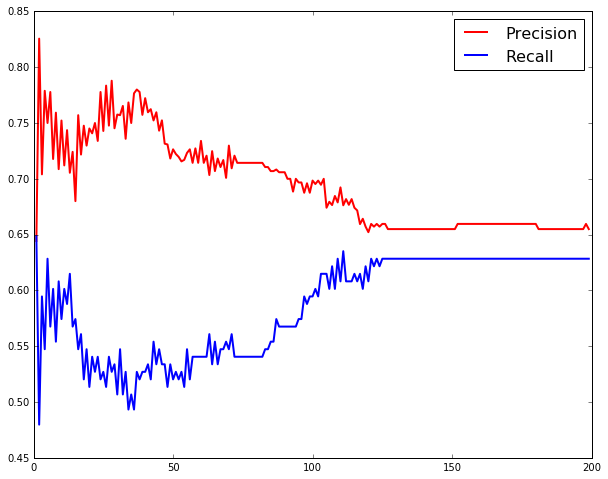

In [80]:
#Graph precision and recall vs k for KNN
pr_at_k = []
max_neigh = 200
for k in range(1,max_neigh):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(train_df, train_surv_list)  
    pred = neigh.predict(test_df)
    pr = precision_recall(pred, test_surv_list)
    pr_at_k.append(pr)
plt.figure(figsize=(10,8))
plt.plot(range(1,max_neigh), [i[0] for i in pr_at_k], color = 'r', linewidth=2)
plt.plot(range(1,max_neigh), [i[1] for i in pr_at_k], color = 'b', linewidth=2)

plt.legend(['Precision', 'Recall'], fontsize=16)

# Can we do better with other ML models?

In [81]:
ml_models = [DecisionTreeClassifier(), RandomForestClassifier(), ExtraTreesClassifier(), \
             AdaBoostClassifier(), GradientBoostingClassifier(), LogisticRegression()]

for model in ml_models:
    clf = model
    clf.fit(train_df, train_surv_list)
    pred = clf.predict(test_df)
    acc = sum(((pred - test_surv_list) == 0))/float(len(pred))
    pr = precision_recall(pred, test_surv_list)
    print model
    print 'Accuracy: ', acc
    print 'Precision: ', pr[0]
    print 'Recall: ', pr[1]
    print '----------'

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
Accuracy:  0.70737913486
Precision:  0.605095541401
Recall:  0.641891891892
----------
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Accuracy:  0.778625954198
Precision:  0.729323308271
Recall:  0.655405405405
----------
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=2

# What is the relative importance of our features?


([<matplotlib.axis.XTick at 0x11ecf710>,
 <a list of 4 Text xticklabel objects>)

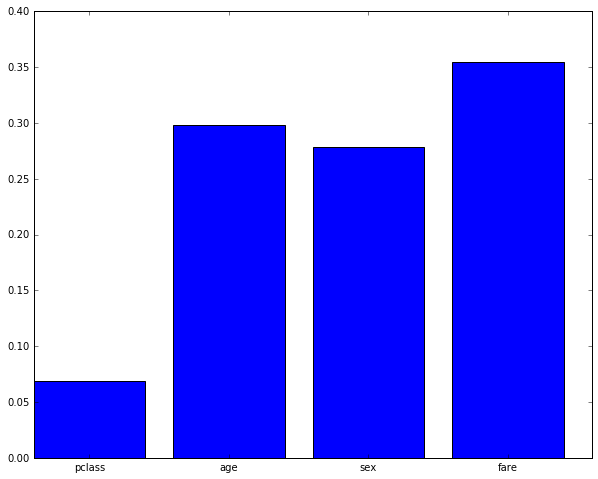

In [82]:
feat_list = ['pclass', 'age', 'sex', 'fare']
clf = RandomForestClassifier()
clf.fit(train_df, train_surv_list)   
plt.figure(figsize=(10,8))
plt.bar([1,2,3,4], clf.feature_importances_, tick_label = feat_list)
plt.xticks([1.4,2.4,3.4,4.4])

# Beware of Machine Learning Pitfalls

## Train-Test Contamination

In [83]:
#WRONG WRONG WRONG!!!!!!
clfs = {
    'RF': RandomForestClassifier(),
    'LR': LogisticRegression(),
    'GB': GradientBoostingClassifier(),
    'ET': ExtraTreesClassifier(),
    'KNN': KNeighborsClassifier(),
    'AB': AdaBoostClassifier()
}

for clf_name in clfs.keys():
    print clf_name + ' - WRONG!'
    clf = clfs[clf_name]
    clf.fit(train_df, train_surv_list)   
    pred = clf.predict(train_df)

    acc = sum(((pred - train_surv_list) == 0))/float(len(pred))
    print 'Accuracy: ', acc
    print '----------------------------------------------'

KNN - WRONG!
Accuracy:  0.841530054645
----------------------------------------------
AB - WRONG!
Accuracy:  0.806557377049
----------------------------------------------
RF - WRONG!
Accuracy:  0.96174863388
----------------------------------------------
LR - WRONG!
Accuracy:  0.794535519126
----------------------------------------------
GB - WRONG!
Accuracy:  0.87650273224
----------------------------------------------
ET - WRONG!
Accuracy:  0.983606557377
----------------------------------------------


## Predicting Something That's Already Known

In [84]:
#WRONG WRONG WRONG!!!!!!
feat_list = ['sex', 'age', 'fare', 'survived']
clfs = {
    'RF': RandomForestClassifier(),
    'LR': LogisticRegression(),
    'GB': GradientBoostingClassifier(),
    'ET': ExtraTreesClassifier(),
    'KNN': KNeighborsClassifier(),
    'AB': AdaBoostClassifier()
}

for clf_name in clfs.keys():
    print clf_name + ' - WRONG!'
    clf = clfs[clf_name]
    clf.fit(train_df, train_surv_list)   
    pred = clf.predict(train_df)

    acc = sum(((pred - train_surv_list) == 0))/float(len(pred))
    print 'Accuracy: ', acc
    print '----------------------------------------------'

KNN - WRONG!
Accuracy:  0.841530054645
----------------------------------------------
AB - WRONG!
Accuracy:  0.806557377049
----------------------------------------------
RF - WRONG!
Accuracy:  0.95956284153
----------------------------------------------
LR - WRONG!
Accuracy:  0.794535519126
----------------------------------------------
GB - WRONG!
Accuracy:  0.87650273224
----------------------------------------------
ET - WRONG!
Accuracy:  0.983606557377
----------------------------------------------
